<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from submission_to_mask import *
from helpers import *
from mask_to_submission import *

Using TensorFlow backend.


In [2]:
def show(img, img2=None):
    if not img2 is None:
        img = np.concatenate((img_to_rgb(img), img_to_rgb(img2)), axis=1)
    else:
        img = img_to_rgb(img)
    plt.figure(figsize=(15,7))
    plt.imshow(img.astype(np.uint8))
    plt.show()

In [3]:
from unet import UNet

In [4]:
unet = UNet(n_channels=3)

In [6]:
model, pred = unet.train(data_dir="../../data/", deepness=2, sample_size=20, batch_size=4, epochs=10, kernel_size=3)

loading data...
>>> all images will be resized to shape: (608, 608, 3)
data loaded
loading model...
model loaded
creating model checkpoint
fitting model...
Train on 16 samples, validate on 4 samples
Epoch 1/10
16/16 [==============================] - 90s 6s/step - loss: 2.1736 - precision: 0.1226 - recall: 0.2374 - f1: 0.0635 - acc: 0.6398 - val_loss: 0.4741 - val_precision: 0.1342 - val_recall: 0.0981 - val_f1: 0.1133 - val_acc: 0.8184
Epoch 2/10
16/16 [==============================] - 90s 6s/step - loss: 0.6511 - precision: 0.2020 - recall: 0.3075 - f1: 0.1874 - acc: 0.6428 - val_loss: 0.4209 - val_precision: 0.0709 - val_recall: 0.0019 - val_f1: 0.0037 - val_acc: 0.8789
Epoch 3/10
16/16 [==============================] - 91s 6s/step - loss: 0.6121 - precision: 0.1511 - recall: 0.0011 - f1: 0.0021 - acc: 0.8044 - val_loss: 0.4014 - val_precision: 0.0887 - val_recall: 0.0017 - val_f1: 0.0034 - val_acc: 0.8798
Epoch 4/10
16/16 [==============================] - 91s 6s/step - loss: 0.5

In [7]:
X_tr, Y, X_te = unet.load_data(sample_size=20)

loading data...
>>> all images will be resized to shape: (608, 608, 3)
data loaded


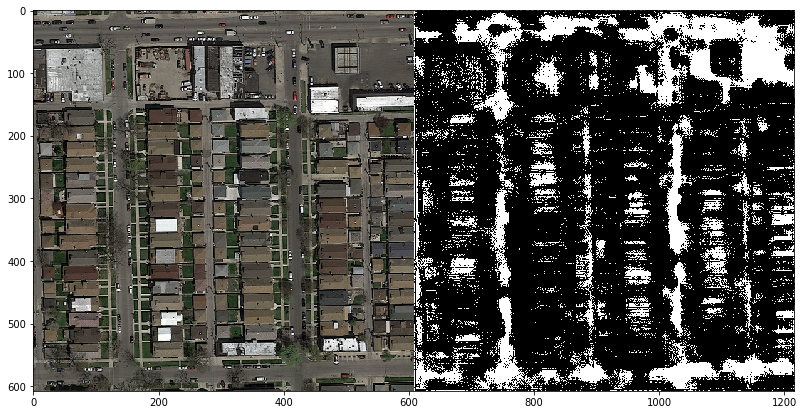

In [27]:
show(X_te[0], (pred[0] > 0.25) * 255)

In [29]:
model = unet.get_model(deepness=2, kernel_size=3)
model.load_weights("u_net.hdf5")

loading model...
model loaded


In [30]:
#pred = model.predict(X_te, batch_size=1, verbose=1)

In [31]:
Y_tr = model.predict(X_tr[:5], batch_size=1, verbose=1)

5/5 [==============================] - 9s 2s/step


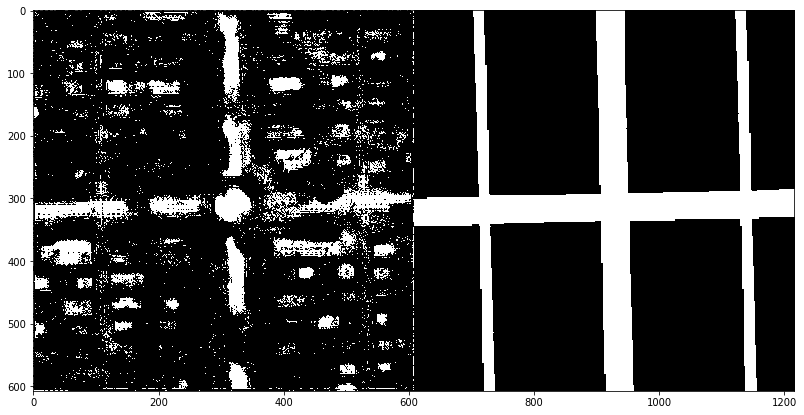

In [34]:
show((Y_tr[0] > 0.3) * 255, Y[0] * 255)

In [14]:
f1_score((Y_tr[0] > 0.4).reshape(-1), Y[0])

NameError: name 'f1_score' is not defined

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 608, 608, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 608, 608, 32) 9248        conv2d_23[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 304, 304, 32) 0           conv2d_24[0][0]                  
__________________________________________________________________________________________________
conv2d_25 

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 608, 608, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 304, 304, 32) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (